In [1]:
import pandas as pd

games = pd.read_csv("Data/games.csv", parse_dates=["GAME_DATE_EST"])
details = pd.read_csv("Data/games_details.csv", low_memory=False)
teams = pd.read_csv("Data/teams.csv")
ranking = pd.read_csv("Data/ranking.csv")
player = pd.read_csv("Data/players.csv")

Golden State Warriors우승 시즌과 이전 시즌의 스타팅 라인업 및 주요 선수 활용 변화 분석(감독관점)
======================================

## Title : 우승 시즌에 어떤 선수를 어떻게 썼길래 결과가 달라졌을까?

### 목적
**“GSW팀의 우승 시즌과 이전 시즌의 스타팅 라인업 및 주요 선수 활용 변화 분석하여,
향후 선수 발굴 및 영입에 활용한다.”**

**분석접근방식**
> 1.우승 시즌에 고정적으로 기용된 스타팅 멤버는 누구? 
> 2.이전 시즌 대비 출전 시간이 늘어난 선수는? 

**전처리 계획**
     1. 우승시즌과 직전 시즌 비교(우승시즌 2014-2015 -> 2015)


**사용할 컬럼** (games_details, games, teams)
1. 우승시즌비교
         SEASON
         GAME_ID
         TEAM_ID   


2. 스타팅 라인업 구성
         GAME_ID
         PLAYER_NAME == TEAM_ID로 해야함
         START_POSITION
         SEASON   

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[ns]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  object        
 3   HOME_TEAM_ID      26651 non-null  int64         
 4   VISITOR_TEAM_ID   26651 non-null  int64         
 5   SEASON            26651 non-null  int64         
 6   TEAM_ID_home      26651 non-null  int64         
 7   PTS_home          26552 non-null  float64       
 8   FG_PCT_home       26552 non-null  float64       
 9   FT_PCT_home       26552 non-null  float64       
 10  FG3_PCT_home      26552 non-null  float64       
 11  AST_home          26552 non-null  float64       
 12  REB_home          26552 non-null  float64       
 13  TEAM_ID_away      26651 non-null  int64         
 14  PTS_away          2655

In [3]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

In [4]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     object 
 5   NICKNAME            30 non-null     object 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     object 
 8   ARENA               30 non-null     object 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null     object 
 11  GENERALMANAGER      30 non-null     object 
 12  HEADCOACH           30 non-null     object 
 13  DLEAGUEAFFILIATION  30 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


In [5]:
games.head(1)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1


In [6]:
details.head(1)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0


In [7]:
# 팀 약어 리스트
teams['ABBREVIATION'].unique()
# GSW

array(['ATL', 'BOS', 'NOP', 'CHI', 'DAL', 'DEN', 'HOU', 'LAC', 'LAL',
       'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX',
       'POR', 'SAC', 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET',
       'CHA', 'CLE', 'GSW'], dtype=object)

In [8]:
#TEAM_ID
teams[teams['ABBREVIATION'] == 'GSW']

# TEAM_ID = 1610612744

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
29,0,1610612744,1946,2019,GSW,Warriors,1946,Golden State,Chase Center,19596.0,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors


In [9]:
#사용할 컬럼 NULL값 확인하기
games[['GAME_ID', 'SEASON', 'HOME_TEAM_WINS']].isna().sum()

GAME_ID           0
SEASON            0
HOME_TEAM_WINS    0
dtype: int64

In [10]:
#GAME_ID 중복 여부 확인 -> 0
games['GAME_ID'].duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
26646    False
26647    False
26648    False
26649    False
26650    False
Name: GAME_ID, Length: 26651, dtype: bool>

In [11]:
#games테이블에 SEASON 유니크값들
games['SEASON'].unique()

array([2022, 2021, 2020, 2019, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2018, 2017, 2016, 2015, 2014])

In [12]:
#GSW가 참여한 경기 모두(홈경기 + 원정경기) => games_gsw 데이터프레임만듬
GSW_ID = 1610612744

games_gsw = games[(games['HOME_TEAM_ID'] == GSW_ID) |
                  (games['VISITOR_TEAM_ID'] == GSW_ID)]

games_gsw

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
6,2022-12-21,22200470,Final,1610612751,1610612744,2022,1610612751,143.0,0.643,0.875,...,42.0,32.0,1610612744,113.0,0.494,0.760,0.364,32.0,36.0,1
15,2022-12-20,22200463,Final,1610612752,1610612744,2022,1610612752,132.0,0.517,0.781,...,27.0,47.0,1610612744,94.0,0.473,0.923,0.343,23.0,29.0,1
30,2022-12-18,22200448,Final,1610612761,1610612744,2022,1610612761,110.0,0.421,0.773,...,21.0,43.0,1610612744,126.0,0.531,0.846,0.462,31.0,41.0,0
45,2022-12-16,22200432,Final,1610612755,1610612744,2022,1610612755,118.0,0.459,0.806,...,23.0,49.0,1610612744,106.0,0.415,0.846,0.395,31.0,48.0,1
56,2022-12-14,22200415,Final,1610612754,1610612744,2022,1610612754,125.0,0.506,0.840,...,30.0,34.0,1610612744,119.0,0.465,0.862,0.424,27.0,46.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26592,2014-10-17,11400071,Final,1610612748,1610612744,2014,1610612748,115.0,0.557,0.806,...,18.0,35.0,1610612744,108.0,0.487,0.852,0.290,26.0,29.0,1
26597,2014-10-16,11400063,Final,1610612744,1610612743,2014,1610612744,104.0,0.494,0.667,...,24.0,40.0,1610612743,101.0,0.456,0.733,0.389,18.0,50.0,1
26618,2014-10-12,11400042,Final,1610612747,1610612744,2014,1610612747,75.0,0.366,0.882,...,17.0,37.0,1610612744,116.0,0.562,0.677,0.394,33.0,44.0,0
26632,2014-10-09,11400026,Final,1610612747,1610612744,2014,1610612747,105.0,0.438,0.722,...,22.0,42.0,1610612744,120.0,0.560,0.667,0.571,27.0,39.0,0


In [13]:
#GSW의 일부 필요 컬럼을 => games_gsw_part 데이터 프레임으로 만듬
games_gsw_part = games_gsw[['GAME_ID', 'SEASON', 'HOME_TEAM_WINS']]


In [14]:
#details테이블에 위에만든 games_gsw_part 데이터 프레임의 GAME_ID 기준으로 INNER JOIN 진행
merged_gsw = details.merge(games_gsw_part, on='GAME_ID', how='inner')
merged_gsw

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,HOME_TEAM_WINS
0,22200470,1610612744,GSW,Golden State,1630228,Jonathan Kuminga,Jonathan,F,NaN,30:15,...,6.0,4.0,1.0,0.0,4.0,2.0,4.0,-23.0,2022,1
1,22200470,1610612744,GSW,Golden State,203110,Draymond Green,Draymond,F,NaN,23:16,...,4.0,6.0,0.0,0.0,2.0,2.0,2.0,-27.0,2022,1
2,22200470,1610612744,GSW,Golden State,1626172,Kevon Looney,Kevon,C,NaN,16:55,...,7.0,1.0,0.0,0.0,1.0,3.0,6.0,-10.0,2022,1
3,22200470,1610612744,GSW,Golden State,1630541,Moses Moody,Moses,G,NaN,30:55,...,1.0,3.0,1.0,0.0,0.0,3.0,17.0,-14.0,2022,1
4,22200470,1610612744,GSW,Golden State,1629673,Jordan Poole,Jordan,G,NaN,26:11,...,1.0,2.0,1.0,0.0,7.0,1.0,13.0,-31.0,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45711,11200009,1610612744,GSW,Golden State,203145,Kent Bazemore,NaN,NaN,NaN,7,...,0.0,1.0,0.0,0.0,1.0,0.0,5.0,NaN,2012,0
45712,11200009,1610612744,GSW,Golden State,202691,Klay Thompson,NaN,NaN,NaN,26,...,3.0,4.0,1.0,0.0,1.0,2.0,18.0,NaN,2012,0
45713,11200009,1610612744,GSW,Golden State,203164,Lance Goulbourne,NaN,NaN,NaN,7,...,3.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,2012,0
45714,11200009,1610612744,GSW,Golden State,2210,Richard Jefferson,NaN,NaN,NaN,16,...,5.0,2.0,0.0,1.0,0.0,3.0,9.0,NaN,2012,0


In [15]:
#GSW만 필터링작업
gsw = merged_gsw = merged_gsw[merged_gsw['TEAM_ABBREVIATION'] == 'GSW']
gsw.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,HOME_TEAM_WINS
0,22200470,1610612744,GSW,Golden State,1630228,Jonathan Kuminga,Jonathan,F,NaN,30:15,...,6.0,4.0,1.0,0.0,4.0,2.0,4.0,-23.0,2022,1
1,22200470,1610612744,GSW,Golden State,203110,Draymond Green,Draymond,F,NaN,23:16,...,4.0,6.0,0.0,0.0,2.0,2.0,2.0,-27.0,2022,1
2,22200470,1610612744,GSW,Golden State,1626172,Kevon Looney,Kevon,C,NaN,16:55,...,7.0,1.0,0.0,0.0,1.0,3.0,6.0,-10.0,2022,1
3,22200470,1610612744,GSW,Golden State,1630541,Moses Moody,Moses,G,NaN,30:55,...,1.0,3.0,1.0,0.0,0.0,3.0,17.0,-14.0,2022,1
4,22200470,1610612744,GSW,Golden State,1629673,Jordan Poole,Jordan,G,NaN,26:11,...,1.0,2.0,1.0,0.0,7.0,1.0,13.0,-31.0,2022,1


In [16]:
#우승 직전/후로 나뉘니까 2016부터는 데이터 불필요.
gsw = gsw[gsw['SEASON'] <= 2015]

In [17]:
#우승시즌 2014-2015, 우승직전시즌 전체
#champioship 2014-2015 우승시즌
#pre-championship 2013-2014 우승전 시즌
def season_group(season):
    if season == 2014:
        return "champioship(2014-2015)" 
    elif season == 2013:
        return "pre-championship(2013-2014)"
    
gsw['SEASON_GROUP'] = gsw['SEASON'].apply(season_group)

C:\Users\magic\AppData\Local\Temp\ipykernel_18312\863331796.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsw['SEASON_GROUP'] = gsw['SEASON'].apply(season_group)


In [18]:
#스타팅 라인업 -> START_POSITION 값이 있는 것만
starters = gsw[gsw['START_POSITION'].notna()]
starters

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,HOME_TEAM_WINS,SEASON_GROUP
7019,20801229,1610612744,GSW,Golden State,101235,Kelenna Azubuike,NaN,F,NaN,46:54,...,1.0,1.0,4.0,1.0,3.0,18.0,-3.0,2008,1,None
7020,20801229,1610612744,GSW,Golden State,201576,Anthony Randolph,NaN,F,NaN,35:03,...,2.0,0.0,0.0,1.0,4.0,14.0,-3.0,2008,1,None
7021,20801229,1610612744,GSW,Golden State,101142,Ronny Turiaf,NaN,C,NaN,17:45,...,0.0,1.0,0.0,3.0,4.0,8.0,-1.0,2008,1,None
7022,20801229,1610612744,GSW,Golden State,201627,Anthony Morrow,NaN,G,NaN,43:53,...,3.0,0.0,0.0,2.0,2.0,33.0,4.0,2008,1,None
7023,20801229,1610612744,GSW,Golden State,201228,C.J. Watson,NaN,G,NaN,44:50,...,12.0,3.0,1.0,3.0,4.0,20.0,0.0,2008,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45493,21200010,1610612744,GSW,Golden State,203084,Harrison Barnes,NaN,F,NaN,13:48,...,1.0,0.0,0.0,0.0,1.0,6.0,-2.0,2012,0,None
45494,21200010,1610612744,GSW,Golden State,101135,David Lee,NaN,F,NaN,39:15,...,3.0,0.0,1.0,1.0,4.0,6.0,3.0,2012,0,None
45495,21200010,1610612744,GSW,Golden State,101106,Andrew Bogut,NaN,C,NaN,18:29,...,1.0,0.0,1.0,0.0,1.0,8.0,-7.0,2012,0,None
45496,21200010,1610612744,GSW,Golden State,202691,Klay Thompson,NaN,G,NaN,33:45,...,1.0,0.0,0.0,4.0,2.0,16.0,-10.0,2012,0,None


In [19]:
#시즌별 스타팅 횟수 집계
starter_count = (starters.groupby(['SEASON_GROUP', 'PLAYER_NAME']).size().reset_index(name='start_games'))
starter_count.head(10)

,SEASON_GROUP,PLAYER_NAME,start_games
0,champioship(2014-2015),Andre Iguodala,7
1,champioship(2014-2015),Andrew Bogut,89
2,champioship(2014-2015),David Lee,11
3,champioship(2014-2015),Draymond Green,101
4,champioship(2014-2015),Festus Ezeli,7
5,champioship(2014-2015),Harrison Barnes,108
6,champioship(2014-2015),Justin Holiday,4
7,champioship(2014-2015),Klay Thompson,105
8,champioship(2014-2015),Leandro Barbosa,1
9,champioship(2014-2015),Marreese Speights,9


In [20]:
# 각 시즌별 스타팅 횟수가 많은 순서대로 나열.
starter_count.sort_values(['SEASON_GROUP', 'start_games'], ascending=False).head(10)

,SEASON_GROUP,PLAYER_NAME,start_games
21,pre-championship(2013-2014),Klay Thompson,88
23,pre-championship(2013-2014),Stephen Curry,85
16,pre-championship(2013-2014),David Lee,74
14,pre-championship(2013-2014),Andre Iguodala,70
15,pre-championship(2013-2014),Andrew Bogut,67
18,pre-championship(2013-2014),Harrison Barnes,24
17,pre-championship(2013-2014),Draymond Green,16
20,pre-championship(2013-2014),Jermaine O'Neal,16
22,pre-championship(2013-2014),Marreese Speights,3
19,pre-championship(2013-2014),Hilton Armstrong,1


In [21]:
# 각시즌 5명만 추리기
top_starters = (
    starter_count
    .sort_values(['SEASON_GROUP', 'start_games'], ascending=False)
    .groupby('SEASON_GROUP')
    .head(5)
)
top_starters

,SEASON_GROUP,PLAYER_NAME,start_games
21,pre-championship(2013-2014),Klay Thompson,88
23,pre-championship(2013-2014),Stephen Curry,85
16,pre-championship(2013-2014),David Lee,74
14,pre-championship(2013-2014),Andre Iguodala,70
15,pre-championship(2013-2014),Andrew Bogut,67
5,champioship(2014-2015),Harrison Barnes,108
13,champioship(2014-2015),Stephen Curry,108
7,champioship(2014-2015),Klay Thompson,105
3,champioship(2014-2015),Draymond Green,101
1,champioship(2014-2015),Andrew Bogut,89


In [22]:
!pip install matplotlib


'pip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [23]:
#pivot
plot_df = (
    top_starters
    .pivot(
        index='PLAYER_NAME',
        columns='SEASON_GROUP',
        values='start_games'
    )
)
plot_df

SEASON_GROUP,champioship(2014-2015),pre-championship(2013-2014)
PLAYER_NAME,,
Andre Iguodala,NaN,70.0
Andrew Bogut,89.0,67.0
David Lee,NaN,74.0
Draymond Green,101.0,NaN
Harrison Barnes,108.0,NaN
Klay Thompson,105.0,88.0
Stephen Curry,108.0,85.0


In [24]:
!python -m pip install matplotlib


우승 이전 시즌 vs 우승 시즌의 스타팅 멤버 TOP5의 각 출전횟수를 비교
- 우승직전과 우승시즌의 핵심멤버가 누구인지 한눈에 보고 싶다.

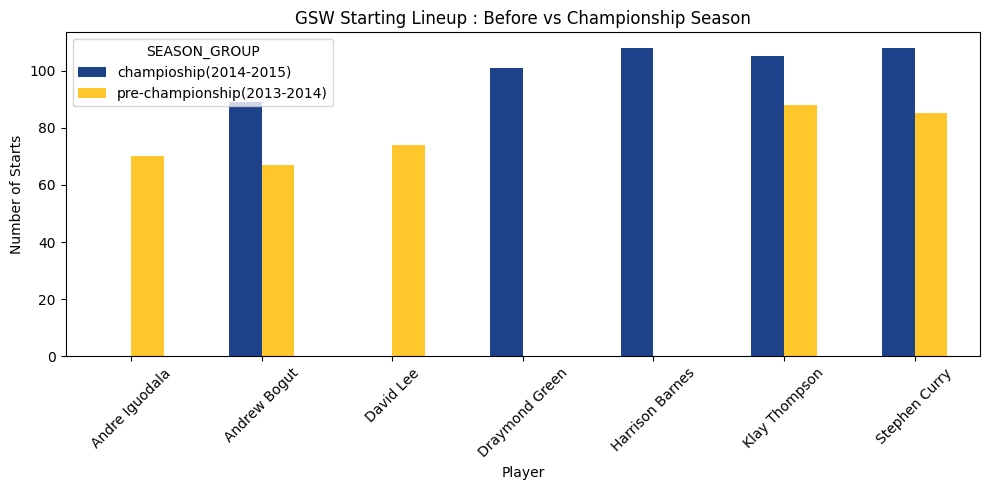

In [25]:
#막대그래프 시각화
import matplotlib.pyplot as plt

gsw_blue = '#1D428A'
gsw_yellow = '#FFC72C'

plot_df.plot(
    kind='bar',
    figsize=(10, 5),
    color=[gsw_blue, gsw_yellow]
)

plt.title("GSW Starting Lineup : Before vs Championship Season")
plt.xlabel("Player")
plt.ylabel("Number of Starts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


그래프해석
- 주전선수가 바뀌었다. Draymond Green, Harrison Barnes선수는 새롭게 주전으로 출전했다.
- Draymond green은 직전시즌에서는 스타팅 출전이 거의 없었지만 우승시즌에 가장 많은 스타팅 멤버로 출전함
- Andre iguodala와 Daivid Lee는 이전 시즌에 스타팅 멤버로 출전했으나, 우승 시즌에는 스타팅 멤버로 출전이 거의 없다.
- Stephen Curry와 Klay Thompson은 우승 전후와 상관없이 높은 스타팅 출전 횟수를 유지하고있다.
- Andrew Bogut는 우승시즌에 스타팅 멤버 출전 횟수가 소폭 상승했다.

"우승 시즌에 고정적으로 기용된 스타팅 멤버는 누구"
Andrew Bogut, Draymond Green, Harrison Barnes, Klay Thompson, Stephen Curry 이렇게 5명이고 우승에 큰 기여를 했다고 보인다.

# **1/28(수) 진행 예정사항**

**2.이전 시즌 대비 출전 시간이 늘어난 선수는? (1/28 진행예정)**
스타팅횟수와 출전시간이 늘어났다면 그만큼 실력이 있어서 감독의 신뢰가 있는 선수가 아닐까?
우승시즌에 특정 선수가 진짜로 더 오래 뛰었을까?

**3.팀 성과 개선이 특정 선수때문일까? 라인업/운영 변화일까? (시간남을시)**


**전처리 계획**
     1. games_details.csv
          - MIN(TEXT) -> "32:12" TEXT형태를 분단위 실수로 변환
     2. gsw['SEASON_GROUP]


사용할 컬럼 (games_details, games, teams)
    1. MIN

In [26]:
#MIN(출전시간) 데이터 셋 확인
# MIN                      str
details.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
NICKNAME              object
START_POSITION        object
COMMENT               object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

In [27]:
#문자열 --> 숫자로 변환. 분단위의 실수로 계산
def min_to_float(x):
    if pd.isna(x):
        return 0

    x = str(x)

    if ':' in x:                         # "32:11"같은 형태
        m, s = x.split(':')
        return int(m) + int(s) / 60

    if x.isdigit():                      # "12" 같은 형태
        return int(x)

    return 0
gsw['MIN_FLOAT'] = gsw['MIN'].apply(min_to_float)

C:\Users\magic\AppData\Local\Temp\ipykernel_18312\1121688270.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsw['MIN_FLOAT'] = gsw['MIN'].apply(min_to_float)


In [28]:
gsw['MIN_FLOAT']

7019     46.900000
7020     35.050000
7021     17.750000
7022     43.883333
7023     44.833333
           ...    
45711     7.000000
45712    26.000000
45713     7.000000
45714    16.000000
45715     6.000000
Name: MIN_FLOAT, Length: 14798, dtype: float64

In [29]:
#소수점 2자리 반올림
gsw['MIN_FLOAT'] = gsw['MIN_FLOAT'].round(2)
gsw['MIN_FLOAT']

C:\Users\magic\AppData\Local\Temp\ipykernel_18312\1780798108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsw['MIN_FLOAT'] = gsw['MIN_FLOAT'].round(2)


7019     46.90
7020     35.05
7021     17.75
7022     43.88
7023     44.83
         ...  
45711     7.00
45712    26.00
45713     7.00
45714    16.00
45715     6.00
Name: MIN_FLOAT, Length: 14798, dtype: float64

In [30]:
#위 사용했던 시즌 그룹 사용
gsw['SEASON_GROUP'] = gsw['SEASON'].apply(season_group)


C:\Users\magic\AppData\Local\Temp\ipykernel_18312\2784083571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsw['SEASON_GROUP'] = gsw['SEASON'].apply(season_group)


In [31]:
#선수별 출전시간? 경기수가 각각 다르니까 평균으로 계산
avg_minute = (gsw.groupby(['SEASON_GROUP', 'PLAYER_NAME'])['MIN_FLOAT'].mean().reset_index())
avg_minute['MIN_FLOAT'] = avg_minute['MIN_FLOAT'].round(2)
avg_minute.head()

,SEASON_GROUP,PLAYER_NAME,MIN_FLOAT
0,champioship(2014-2015),Aaron Craft,7.34
1,champioship(2014-2015),Andre Iguodala,26.03
2,champioship(2014-2015),Andrew Bogut,22.20
3,champioship(2014-2015),Brandon Rush,3.48
4,champioship(2014-2015),David Lee,14.06


In [32]:
#top선수만 
top_minutes = (
    avg_minute
    .sort_values(['SEASON_GROUP', 'MIN_FLOAT'], ascending=False)
    .groupby('SEASON_GROUP')
    .head(5)
)
top_minutes

,SEASON_GROUP,PLAYER_NAME,MIN_FLOAT
38,pre-championship(2013-2014),Stephen Curry,35.43
32,pre-championship(2013-2014),Klay Thompson,34.89
23,pre-championship(2013-2014),David Lee,29.00
20,pre-championship(2013-2014),Andre Iguodala,27.55
27,pre-championship(2013-2014),Harrison Barnes,26.31
19,champioship(2014-2015),Stephen Curry,32.64
5,champioship(2014-2015),Draymond Green,31.64
11,champioship(2014-2015),Klay Thompson,31.50
7,champioship(2014-2015),Harrison Barnes,28.96
1,champioship(2014-2015),Andre Iguodala,26.03


In [33]:
#pivot
plot_df2 = (
    top_minutes
    .pivot(
        index='PLAYER_NAME',
        columns='SEASON_GROUP',
        values='MIN_FLOAT'
    )
)
plot_df2

SEASON_GROUP,champioship(2014-2015),pre-championship(2013-2014)
PLAYER_NAME,,
Andre Iguodala,26.03,27.55
David Lee,NaN,29.00
Draymond Green,31.64,NaN
Harrison Barnes,28.96,26.31
Klay Thompson,31.50,34.89
Stephen Curry,32.64,35.43


GSW 우승이전시즌 VS우승시즌 평균 출전시간이 제일 높은 선수 비교
- 평균 출전시간을 선수별로 알고싶다.

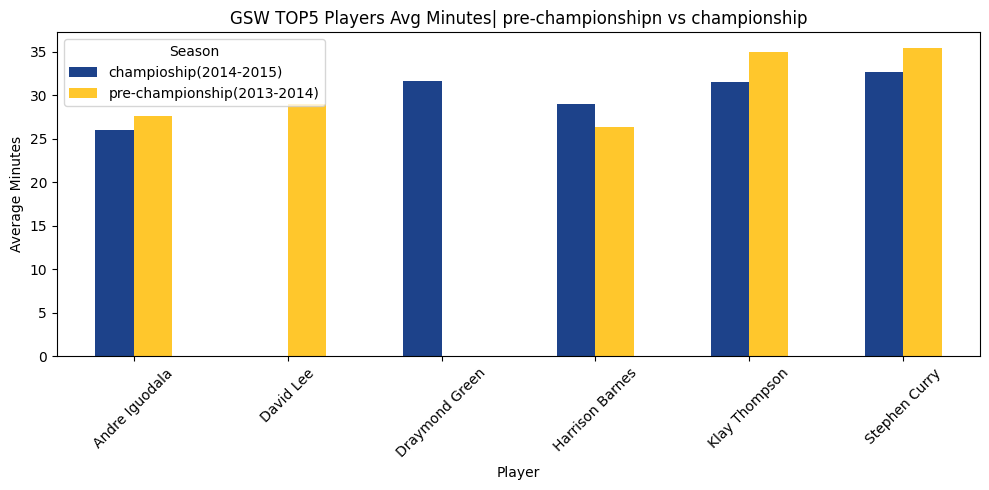

In [34]:
#막대그래프 시각화

plot_df2.plot(
    kind='bar',
    figsize=(10, 5),
    color=[gsw_blue, gsw_yellow]
)

plt.title("GSW TOP5 Players Avg Minutes| pre-championshipn vs championship")
plt.xlabel("Player")
plt.ylabel("Average Minutes")
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

그래프 해석
- Draymond Green 선수는 이전 시즌에 출전시간이 거의 없는 것으로 보아, 새로 영입된 선수이거나 그동안 기회가 없던 선수로 보인다.
- Draymond Green은 우승 시즌에는 약 30분 이상 출전했다.
- Daivid Lee는 이전시즌에서는 출전시간이 높았지만, 우승 시즌에서는 거의 비중이 급감한 것으로 보인다.
- Harrison Barnes선수는 우승 시즌에 평균 출전 시간이 증가했다.
- Klay Thompson, Stephen Curry선수는 우승시즌에 오히려 이전 시즌보다 평균 출전시간이 줄었다.
- Andre Igudala선수는 우승 전후로 평균 출전시간이 소폭 감소하였다.

**이전 시즌 대비 출전 시간이 늘어난 선수는?
Draymond Green, Harrison Barnes선수

# 최종결론 

### Top topic1 : 우승 시즌에 어떤 선수를 어떻게 썼길래 결과가 달라졌을까?
우승 시즌의 GSW팀은 팀의 기둥인 Stephen Curry와 Klay Thompson 두명의 선수를 여전히 주측으로 활용하면서도, 다른 라인업 변화를 시도 한 것으로 보입니다. 가장 눈에 띄는 변화는 Draymond Green선수 출전 입니다. 이전 시즌애 비해 Draymond Green선수의 선발 횟수와 출전 시간을 대폭 늘린반면, 기존 Daivid Lee와 Andre Iguodala의 선수의 출전 비중을 과감히 줄인 것으로 보입니다. 또한 Harrison Barnes 선수는 평균 출전 시간은 이전과 비슷하거나 늘어났음에도 불구하고, 오히려 선발 출전 횟수는 이전보다 줄어든 모습을 보입니다. 이는 Harrison Barnes선수를 무조건 선발로 고정하기보다, 경기 상황에 맞춰 Andre Iguodala 선수 같은 배테랑과 교체 투입하며 주전 선수들의 에너지 소모를 줄이는 유연한 로테이션 전술을 활용했다고 볼 수 있습니다.


### TO.감독관점 제안
Draymond Green 선수와 같은 포지션 핵심 인재를 영입하고 키워야합니다.

Curry,Thompson은 이전 시즌부터 우승 시즌까지 스타팅 멤버로 선발된 핵심 선수입니다. 이번 우승시즌에는 이전시즌과는 다르게 Draymond Green 선수의 출전시간을 증가시키고 두 선수의 출전 평균 시간이 오히려 소폭 감소였지만, 결과적으로 팀 성적이 상승했습니다.
이는 에이스에게만 의존하던 과거방식에서 벗어나, Draymond Green선수의 출전 시간을 늘려 에이스 선수들의 체력을 비축했기에 가능했던 결과입니다.

결과적으로 특정 선수를 과도하게 소모하기보다, 팀에 실질적인 도움을 줄 수 있는 조력자를 적재적소에 교체 투입하여 48분 내내 팀의 에너지 소모를 최소한으로 유지하는것이 우승을 향한 가장 확실한 전술이 될 것 입니다.